In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#importing the dataset
dataset=pd.read_csv("HousingPrices-Amsterdam-August-2021.csv")

In [5]:
#exploring the dataset
print(dataset.head())
print("\n")
print(dataset.describe())

   Unnamed: 0                                 Address      Zip     Price  \
0           1            Blasiusstraat 8 2, Amsterdam  1091 CR  685000.0   
1           2  Kromme Leimuidenstraat 13 H, Amsterdam  1059 EL  475000.0   
2           3              Zaaiersweg 11 A, Amsterdam  1097 SM  850000.0   
3           4            Tenerifestraat 40, Amsterdam  1060 TH  580000.0   
4           5              Winterjanpad 21, Amsterdam  1036 KN  720000.0   

   Area  Room       Lon        Lat  
0    64     3  4.907736  52.356157  
1    60     3  4.850476  52.348586  
2   109     4  4.944774  52.343782  
3   128     6  4.789928  52.343712  
4   138     5  4.902503  52.410538  


       Unnamed: 0         Price        Area        Room         Lon  \
count  924.000000  9.200000e+02  924.000000  924.000000  924.000000   
mean   462.500000  6.220654e+05   95.952381    3.571429    4.888605   
std    266.880123  5.389942e+05   57.447436    1.592332    0.053140   
min      1.000000  1.750000e+05   2

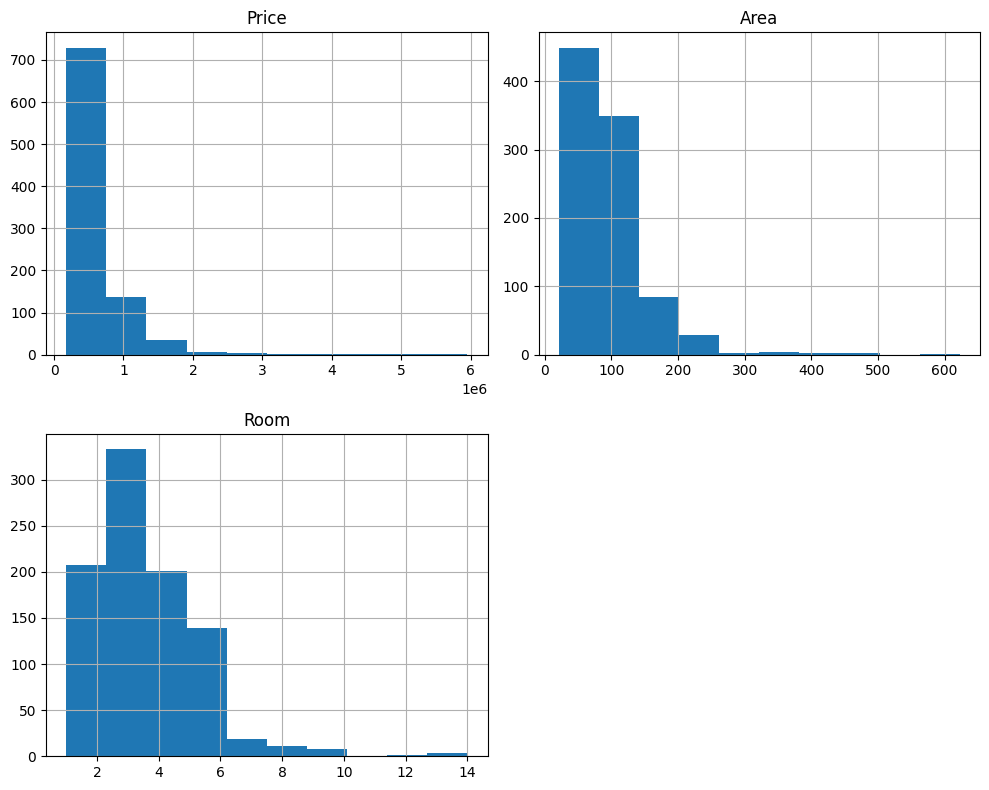

In [8]:
# Histograms for numerical features
dataset[['Price', 'Area', 'Room']].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [19]:
# Data Preprocessing
# Handling missing values
print(dataset.isnull().sum())
# Removing rows with NaN values in the 'Price' column
dataset=dataset.dropna(subset=['Price'])

Unnamed: 0    0
Address       0
Zip           0
Price         0
Area          0
Room          0
Lon           0
Lat           0
dtype: int64


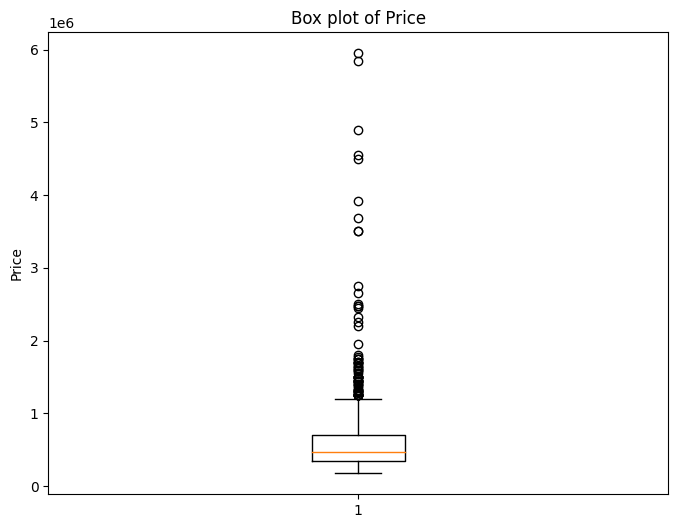

In [20]:
plt.figure(figsize=(8, 6))
plt.boxplot(dataset['Price'])
plt.title('Box plot of Price')
plt.ylabel('Price')
plt.show()


In [21]:
# Removing outliers in the Price Column using IQR (Inter Quartile Range ) Method
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = dataset['Price'].quantile(0.25)
Q3 = dataset['Price'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = dataset[(dataset['Price'] < lower_bound) | (dataset['Price'] > upper_bound)]

print("Number of outliers:", len(outliers))
print("Outliers:", outliers)


Number of outliers: 71
Outliers:      Unnamed: 0                         Address      Zip      Price  Area  \
20           21  Keizersgracht 171 F, Amsterdam  1016 DP  1625000.0   199   
28           29   Colenbranderhof 30, Amsterdam  1065 BG  1650000.0   235   
31           32    Prinseneiland 545, Amsterdam  1013 EC  1950000.0   258   
33           34   Vondelstraat 51 hs, Amsterdam  1054 GJ  3925000.0   319   
57           58            Amstel 13, Amsterdam  1011 PT  1295000.0   145   
..          ...                             ...      ...        ...   ...   
885         886        Levantplein 9, Amsterdam  1019 MA  1450000.0   273   
902         903     Lauriergracht 89, Amsterdam  1016 RJ  1300000.0   139   
906         907     Buiksloterweg 99, Amsterdam  1031 CJ  1250000.0   180   
910         911   Valeriusstraat 193, Amsterdam  1075 EW  1698000.0   205   
917         918       Kromme Waal 18, Amsterdam  1011 BS  1500000.0   194   

     Room       Lon        Lat  
20      6

In [22]:
# Remove outliers
dataset_no_outliers = dataset[(dataset['Price'] >= lower_bound) & (dataset['Price'] <= upper_bound)]

# Display the number of outliers removed
num_outliers_removed = len(dataset) - len(dataset_no_outliers)
print("Number of outliers removed:", num_outliers_removed)


Number of outliers removed: 71


In [32]:
# Importing the necessary libraries for model training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Defining features and target variable
# Example: Add a new feature 'Price_per_Room' by dividing 'Price' by 'Room'
dataset['Price_per_Room'] = dataset['Price'] / dataset['Room']

X = dataset[['Area', 'Room', 'Price_per_Room']]  # 'Area' and 'Room' are the features
y = dataset['Price']

In [33]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Model Training
# Initialize Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [35]:
# Model Evaluation
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error

# Predictions on the testing set
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

from sklearn.metrics import mean_squared_error

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)


Mean Absolute Error: 97818.6830286766
Mean Squared Error: 30669155312.994167
Root Mean Squared Error: 175126.11259602083


In [41]:
# Improving the model's performace

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Initializing the model
model = RandomForestRegressor()

# Performing hyperparameter tuning using GridSearchCV
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Getting the best estimator from the grid search
best_model = grid_search.best_estimator_

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the best model on the scaled training data
best_model.fit(X_train_scaled, y_train)

# Making predictions on the scaled testing data
y_pred = best_model.predict(X_test_scaled)

# Evaluating the model's performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 31720.70239130435
Mean Squared Error (MSE): 8355473609.277283
Root Mean Squared Error (RMSE): 91408.27976325384


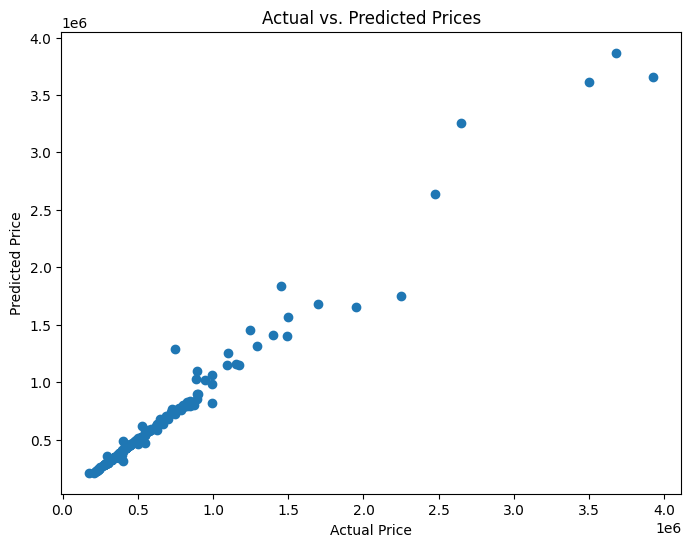

In [42]:
# Visualization of Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.show()

In [43]:
# Prediction (Using the trained model to make predictions for new data points)

# Defining the new data point(s) for prediction
new_data_point = [[70, 3, 190000]]  # Example: 70 sq. meters area, 3 rooms, $190,000 price per room

# Scaling the new data point using the same scaler used for training
scaled_new_data_point = scaler.transform(new_data_point)

# Making predictions on the scaled new data point(s) using the trained model
predicted_price = best_model.predict(scaled_new_data_point)

print("Predicted Price for the new data point:", predicted_price)


Predicted Price for the new data point: [571750.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
